In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
import pmdarima
from arch import arch_model

In [84]:
def best_AR_MA_checker(df,lower,upper):
    from statsmodels.tsa.stattools import adfuller
    arg=np.arange(lower,upper)
    arg1=np.arange(lower,upper)
    best_param_i=0
    best_param_j=0
    temp=12000000
    rs=99
    for i in arg:
        for j in arg1:
            model=sm.tsa.ARIMA(df, order=(i,0,j))
            result=model.fit()
            resid=adfuller(result.resid)
            if (result.aic<temp and  adfuller(result.resid)[1]<0.05):
                temp=result.aic
                best_param_i=i
                best_param_j=j
                rs=resid[1]
                
                
            print ("AR: %d, MA: %d, AIC: %d; resid stationarity check: %d"%(i,j,result.aic,resid[1]))
            
    print("the following function prints AIC criteria and finds the paramters for minimum AIC criteria")        
    print("best AR: %d, best MA: %d, best AIC: %d;  resid stationarity check:%d"%(best_param_i, best_param_j, temp, rs))  

1. lotte

In [172]:
orion_data = pd.read_csv("data_orion.csv", encoding='cp949')
orion_data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2022/12/09,118000,2500,2.16,116500,118500,115500,113335,13309788000,4665263576000,39536132
1,2022/12/08,115500,0,0.00,115500,116000,114000,89520,10305658500,4566423246000,39536132
2,2022/12/07,115500,1500,1.32,114500,118000,114000,94624,10989776000,4566423246000,39536132
3,2022/12/06,114000,-2000,-1.72,115500,116500,112500,73947,8458677000,4507119048000,39536132
4,2022/12/05,116000,500,0.43,115500,117000,112500,82660,9512392000,4586191312000,39536132
...,...,...,...,...,...,...,...,...,...,...,...
929,2019/03/11,105500,2500,2.43,104000,107500,103500,156146,16406756500,4171061926000,39536132
930,2019/03/08,103000,-3000,-2.83,105500,105500,102500,189904,19642923500,4072221596000,39536132
931,2019/03/07,106000,-1500,-1.40,108000,108000,105000,90729,9681747250,4190829992000,39536132
932,2019/03/06,107500,-2000,-1.83,109000,109500,107000,144852,15622827000,4250134190000,39536132


In [174]:
nova_data = pd.read_csv("data_nova.csv", encoding='cp949')
nova_data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2022/12/09,10150,190,1.91,9960,10150,9950,59320,596096150,190361707200,18754848
1,2022/12/08,9960,-90,-0.90,10050,10100,9900,112214,1118637780,186798286080,18754848
2,2022/12/07,10050,0,0.00,10000,10150,9980,54289,544586350,188486222400,18754848
3,2022/12/06,10050,-150,-1.47,10100,10300,10000,80793,815535750,188486222400,18754848
4,2022/12/05,10200,0,0.00,10150,10300,10000,107238,1090371000,191299449600,18754848
...,...,...,...,...,...,...,...,...,...,...,...
929,2019/03/11,11762,1454,14.11,10516,11762,10438,1075934,23464904650,203934711000,9003740
930,2019/03/08,10308,52,0.51,10256,10671,10048,138594,2781642550,178724239000,9003740
931,2019/03/07,10256,52,0.51,10074,10593,10074,144751,2890662350,177823865000,9003740
932,2019/03/06,10204,-78,-0.76,10490,10645,9996,110209,2170752900,176923491000,9003740


In [77]:
lotte_data = pd.read_csv("data_lotte_f.csv", encoding = 'cp949')
lotte_data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2022/12/09,90100,1900,2.15,88700,90400,88200,87009,7807481200,2548816825500,28288755
1,2022/12/08,88200,-2300,-2.54,90200,90400,87800,103301,9131482200,2495068191000,28288755
2,2022/12/07,90500,4700,5.48,85900,90700,85600,202934,18132611400,2560132327500,28288755
3,2022/12/06,85800,700,0.82,84700,86900,84300,87333,7515273500,2427175179000,28288755
4,2022/12/05,85100,1200,1.43,83900,86000,83500,73324,6239190700,2407373050500,28288755
...,...,...,...,...,...,...,...,...,...,...,...
929,2019/03/11,188500,-500,-0.26,190000,190000,187500,52760,9947621500,5332430317500,28288755
930,2019/03/08,189000,500,0.27,188500,193000,187500,64773,12361392500,5346574695000,28288755
931,2019/03/07,188500,-500,-0.26,188500,190000,187000,73133,13749816000,5332430317500,28288755
932,2019/03/06,189000,-1500,-0.79,190500,190500,188500,60949,11534360000,5346574695000,28288755


In [175]:
orion_value = orion_data.iloc[933::-1, 0:2]
orion_value = orion_value.set_index('일자')
orion_value

,종가
일자,
2019/03/05,109500
2019/03/06,107500
2019/03/07,106000
2019/03/08,103000
2019/03/11,105500
...,...
2022/12/05,116000
2022/12/06,114000
2022/12/07,115500


In [176]:
nova_value = nova_data.iloc[933::-1, 0:2]
nova_value = nova_value.set_index('일자')
nova_value

,종가
일자,
2019/03/05,10282
2019/03/06,10204
2019/03/07,10256
2019/03/08,10308
2019/03/11,11762
...,...
2022/12/05,10200
2022/12/06,10050
2022/12/07,10050


In [80]:
lotte_value = lotte_data.iloc[933::-1, 0:2]
lotte_value = lotte_value.set_index('일자')
lotte_value

,종가
일자,
2019/03/05,190500
2019/03/06,189000
2019/03/07,188500
2019/03/08,189000
2019/03/11,188500
...,...
2022/12/05,85100
2022/12/06,85800
2022/12/07,90500


In [78]:
lotte_v = lotte_data.iloc[933:115:-1, 0:2]
lotte_v = lotte_v.set_index('일자')
lotte_v

,종가
일자,
2019/03/05,190500
2019/03/06,189000
2019/03/07,188500
2019/03/08,189000
2019/03/11,188500
...,...
2022/06/17,97900
2022/06/20,98100
2022/06/21,103000


In [79]:
lotte_real = lotte_data.iloc[115:0:-1, 0:2]
lotte_real = lotte_real.set_index('일자')
lotte_real

,종가
일자,
2022/06/24,101000
2022/06/27,103500
2022/06/28,103000
2022/06/29,102000
2022/06/30,104000
...,...
2022/12/02,83900
2022/12/05,85100
2022/12/06,85800


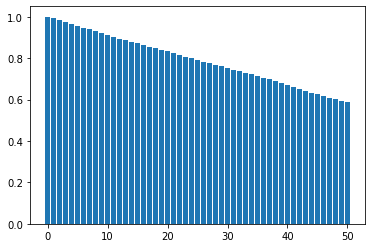

In [81]:
acfl = stattools.acf(np.array(lotte_v), nlags=50, qstat=True, fft=False)
plt.bar(range(51), acfl[0])
plt.show()

In [82]:
print(acfl[2])

[1.63051559e-177 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]


In [85]:
kpss_diffs = pmdarima.arima.ndiffs(lotte_v, alpha=0.05, test='kpss', max_d=6)
adf_diffs = pmdarima.arima.ndiffs(lotte_v, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [86]:
best_AR_MA_checker(lotte_v, 0, 5)

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 0, MA: 0, AIC: 15018; resid stationarity check: 0
AR: 0, MA: 1, AIC: 15020; resid stationarity check: 0
AR: 0, MA: 2, AIC: 15022; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 0, MA: 3, AIC: 15024; resid stationarity check: 0
AR: 0, MA: 4, AIC: 15026; resid stationarity check: 0
AR: 1, MA: 0, AIC: 15020; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 1, MA: 1, AIC: 15022; resid stationarity check: 0
AR: 1, MA: 2, AIC: 15024; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 1, MA: 3, AIC: 15026; resid stationarity check: 0
AR: 1, MA: 4, AIC: 15028; resid stationarity check: 0
AR: 2, MA: 0, AIC: 15022; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 2, MA: 1, AIC: 15024; resid stationarity check: 0
AR: 2, MA: 2, AIC: 15026; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 2, MA: 3, AIC: 15028; resid stationarity check: 0
AR: 2, MA: 4, AIC: 15030; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 3, MA: 0, AIC: 15024; resid stationarity check: 0
AR: 3, MA: 1, AIC: 15026; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 3, MA: 2, AIC: 15028; resid stationarity check: 0
AR: 3, MA: 3, AIC: 15030; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 3, MA: 4, AIC: 15032; resid stationarity check: 0
AR: 4, MA: 0, AIC: 15026; resid stationarity check: 0
AR: 4, MA: 1, AIC: 15028; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 4, MA: 2, AIC: 15030; resid stationarity check: 0
AR: 4, MA: 3, AIC: 15026; resid stationarity check: 0
AR: 4, MA: 4, AIC: 15034; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 0, best MA: 0, best AIC: 15018;  resid stationarity check:0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [87]:
lotte_model = sm.tsa.ARIMA(lotte_v, order=(0,1,0))
lotte_res = lotte_model.fit()
print(lotte_res.summary())

                               SARIMAX Results                                
Dep. Variable:                     종가   No. Observations:                  818
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7508.254
Date:                Sun, 11 Dec 2022   AIC                          15018.509
Time:                        13:54:29   BIC                          15023.214
Sample:                             0   HQIC                         15020.315
                                - 818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.615e+06    1.9e+05     29.569      0.000    5.24e+06    5.99e+06
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               197.00
Prob(Q):                              0.53   Pr

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)


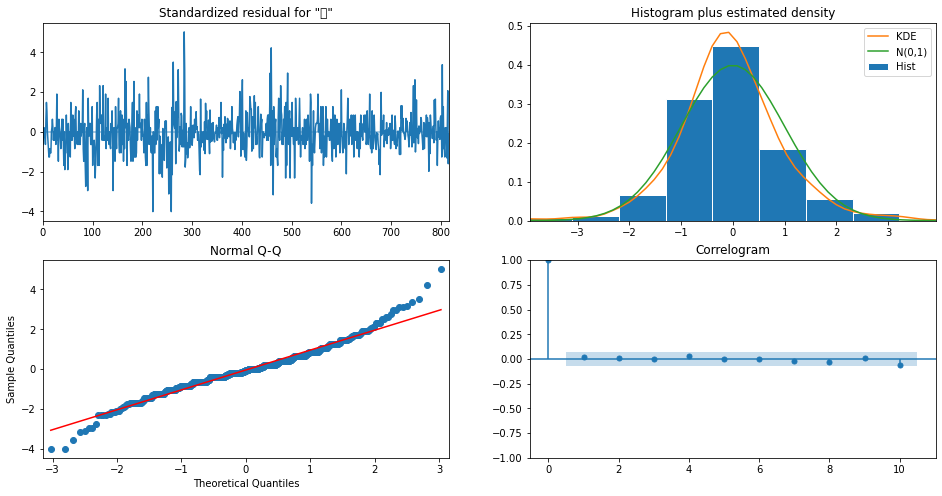

In [88]:
lotte_res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [89]:
lotte_predict = lotte_res.forecast(steps = 115) 
#lotte_predict = pd.DataFrame(lotte_predict, index=lotte_real.index)
lotte_predict_data = pd.DataFrame(lotte_predict)
lotte_predict_data = lotte_predict_data.set_index(lotte_real.index)
lotte_predict_data

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
일자,
2022/06/24,98900.0
2022/06/27,98900.0
2022/06/28,98900.0
2022/06/29,98900.0
2022/06/30,98900.0
...,...
2022/12/02,98900.0
2022/12/05,98900.0
2022/12/06,98900.0


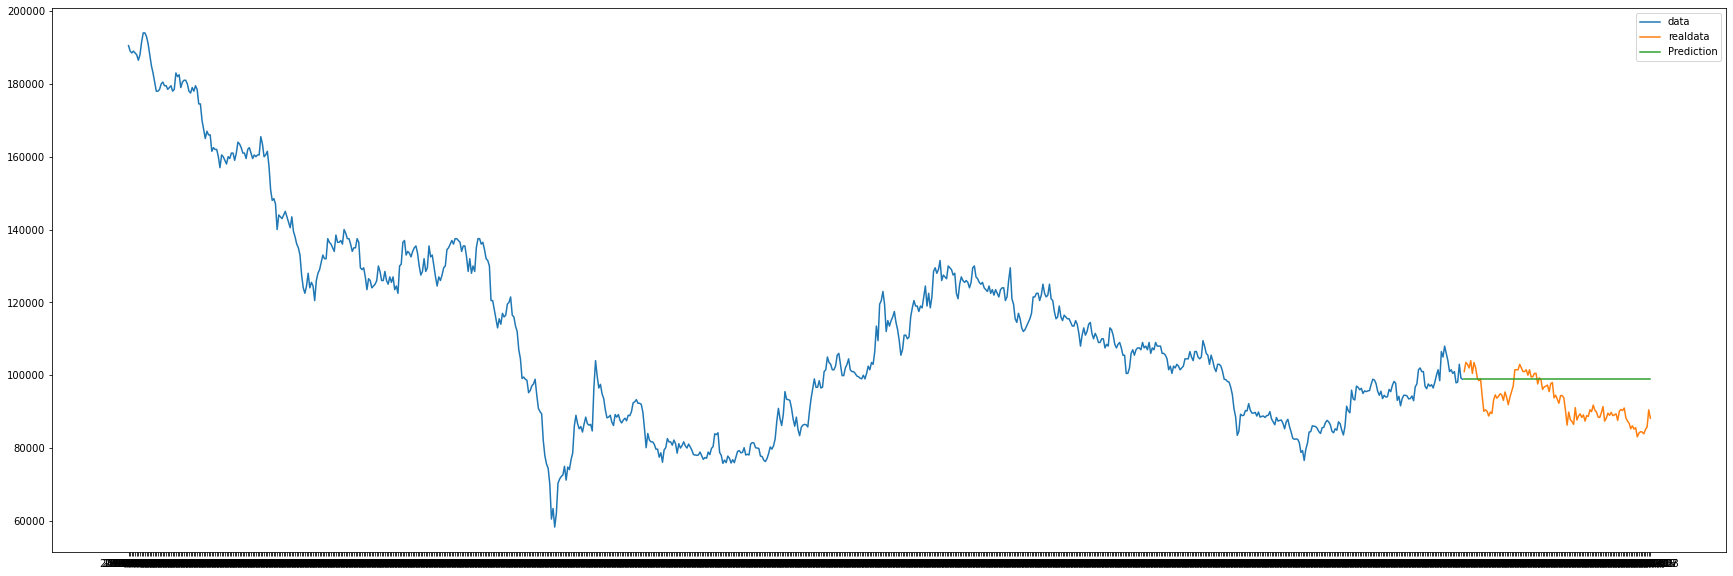

In [90]:
fig, axes = plt.subplots(1, 1, figsize=(30, 10))
plt.plot(lotte_v, label = 'data')
plt.plot(lotte_real, label = 'realdata')
plt.plot(lotte_predict_data, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

2. 에코프로비엠

In [91]:
eco_data = pd.read_csv("data_ecopbm_f.csv", encoding = 'cp949')
eco_data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2022/12/09,101000,-2500,-2.42,104500,105000,99100,1493777,149827864500,9877935744000,97801344
1,2022/12/08,103500,-1500,-1.43,104700,105600,103300,604990,62989629400,10122439104000,97801344
2,2022/12/07,105000,600,0.57,103100,106000,103100,596945,62512406900,10269141120000,97801344
3,2022/12/06,104400,-2300,-2.16,105000,105900,103700,787926,82434859000,10210460313600,97801344
4,2022/12/05,106700,-3200,-2.91,110000,110900,106000,878090,94596832000,10435403404800,97801344
...,...,...,...,...,...,...,...,...,...,...,...
929,2019/03/11,17098,-173,-1.00,17197,17370,16332,394610,26878052900,1373620000000,19850000
930,2019/03/08,17271,-25,-0.14,17296,17493,16703,472140,32596959300,1387515000000,19850000
931,2019/03/07,17296,321,1.89,17370,17889,17098,1019641,72305267800,1389500000000,19850000
932,2019/03/06,16975,1359,8.70,15912,17197,15739,1484460,98263979300,1363695000000,19850000


In [92]:
eco_data['일자'] = pd.to_datetime(eco_data['일자'])
eco_data['일자']

0     2022-12-09
1     2022-12-08
2     2022-12-07
3     2022-12-06
4     2022-12-05
         ...    
929   2019-03-11
930   2019-03-08
931   2019-03-07
932   2019-03-06
933   2019-03-05
Name: 일자, Length: 934, dtype: datetime64[ns]

In [94]:
eco_value = eco_data.iloc[933::-1, 0:2]
eco_value = eco_value.set_index('일자')
eco_value

,종가
일자,
2019-03-05,15616
2019-03-06,16975
2019-03-07,17296
2019-03-08,17271
2019-03-11,17098
...,...
2022-12-05,106700
2022-12-06,104400
2022-12-07,105000


In [93]:
eco_v = eco_data.iloc[933:115:-1, 0:2]
eco_v = eco_v.set_index('일자')
eco_cp = eco_v
eco_v

,종가
일자,
2019-03-05,15616
2019-03-06,16975
2019-03-07,17296
2019-03-08,17271
2019-03-11,17098
...,...
2022-06-17,130291
2022-06-20,130090
2022-06-21,131118


In [95]:
eco_real = eco_data.iloc[115:0:-1, 0:2]
eco_real = eco_real.set_index('일자')
eco_real

,종가
일자,
2022-06-24,124700
2022-06-27,135900
2022-06-28,127900
2022-06-29,121400
2022-06-30,113500
...,...
2022-12-02,109900
2022-12-05,106700
2022-12-06,104400


In [96]:
kpss_diffs = pmdarima.arima.ndiffs(eco_v, alpha=0.05, test='kpss', max_d=6)
adf_diffs = pmdarima.arima.ndiffs(eco_v, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [97]:
best_AR_MA_checker(eco_v, 0, 5)

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 0, MA: 0, AIC: 14880; resid stationarity check: 0
AR: 0, MA: 1, AIC: 14882; resid stationarity check: 0
AR: 0, MA: 2, AIC: 14869; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 0, MA: 3, AIC: 14864; resid stationarity check: 0
AR: 0, MA: 4, AIC: 14865; resid stationarity check: 0
AR: 1, MA: 0, AIC: 14882; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 1, MA: 1, AIC: 14878; resid stationarity check: 0
AR: 1, MA: 2, AIC: 14867; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 1, MA: 3, AIC: 14864; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 4, AIC: 14866; resid stationarity check: 0
AR: 2, MA: 0, AIC: 14871; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 2, MA: 1, AIC: 14870; resid stationarity check: 0
AR: 2, MA: 2, AIC: 14867; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 2, MA: 3, AIC: 14866; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 4, AIC: 14868; resid stationarity check: 0
AR: 3, MA: 0, AIC: 14866; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 3, MA: 1, AIC: 14866; resid stationarity check: 0
AR: 3, MA: 2, AIC: 14867; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 3, MA: 3, AIC: 14868; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 3, MA: 4, AIC: 14870; resid stationarity check: 0
AR: 4, MA: 0, AIC: 14865; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471:

AR: 4, MA: 1, AIC: 14866; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 2, AIC: 14868; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 3, AIC: 14871; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 4, AIC: 14872; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 0, best MA: 3, best AIC: 14864;  resid stationarity check:0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [99]:
eco_model = sm.tsa.ARIMA(eco_v, order=(1, 1, 2))
eco_res = eco_model.fit()
print(eco_res.summary())

                               SARIMAX Results                                
Dep. Variable:                     종가   No. Observations:                  818
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7429.781
Date:                Sun, 11 Dec 2022   AIC                          14867.563
Time:                        13:56:36   BIC                          14886.385
Sample:                             0   HQIC                         14874.786
                                - 818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3551      0.126      2.816      0.005       0.108       0.602
ma.L1         -0.3565      0.126     -2.828      0.005      -0.604      -0.109
ma.L2          0.1535      0.020      7.831      0.0

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)


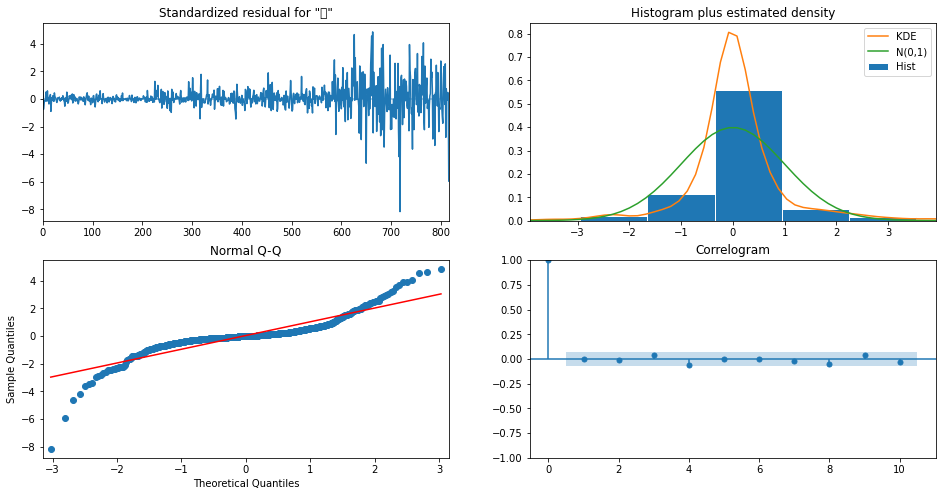

In [100]:
eco_res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [101]:
ep = eco_res.predict()
ep

일자
2019-03-05         0.000000
2019-03-06     15714.955973
2019-03-07     18951.494635
2019-03-08     18186.515941
2019-03-11     17336.214457
                  ...      
2022-06-17    130252.812484
2022-06-20    130314.778474
2022-06-21    130104.626629
2022-06-22    131087.245154
2022-06-23    131011.921319
Name: predicted_mean, Length: 818, dtype: float64

In [102]:
eco_predict = eco_res.forecast(steps = 115) 
eco_predict_data = pd.DataFrame(eco_predict)
eco_predict_data = eco_predict_data.set_index(eco_real.index)
eco_predict_data

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
일자,
2022-06-24,118168.103665
2022-06-27,116204.181196
2022-06-28,115506.775076
2022-06-29,115259.120037
2022-06-30,115171.175557
...,...
2022-12-02,115122.749006
2022-12-05,115122.749006
2022-12-06,115122.749006


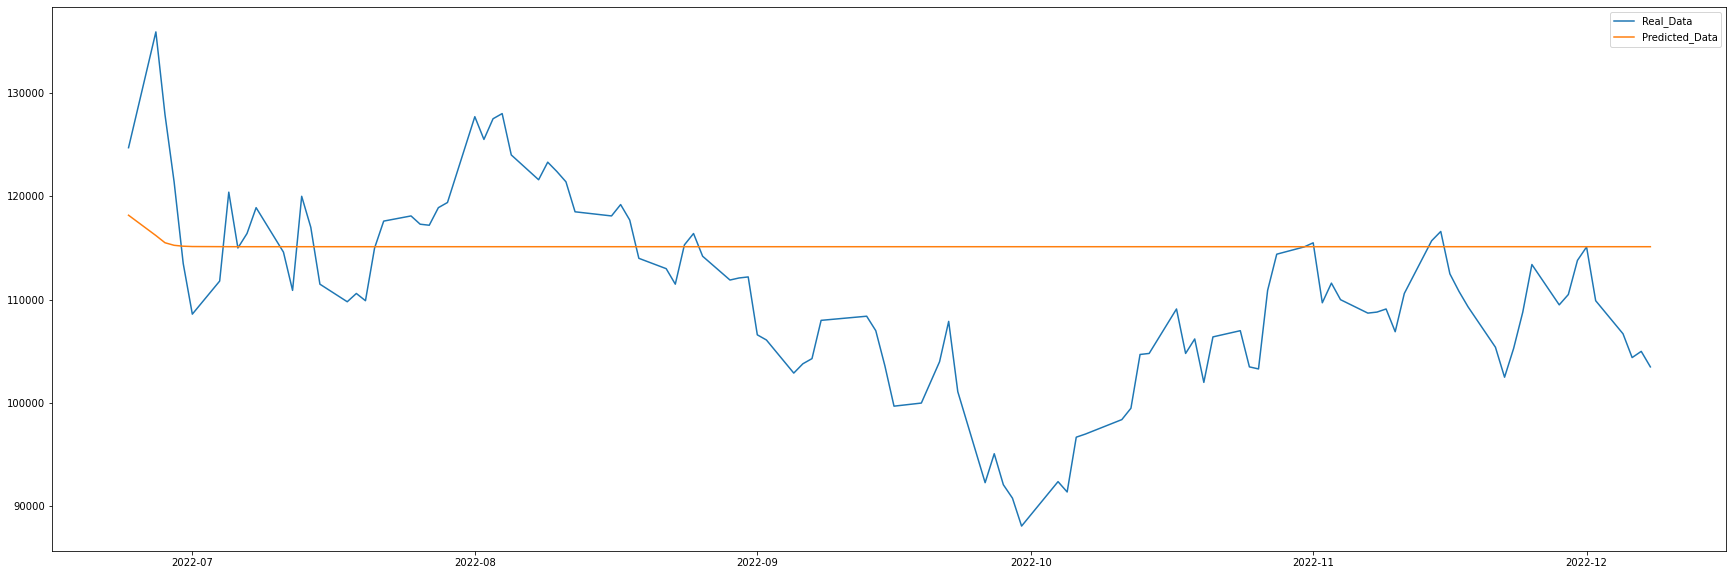

In [103]:
fig, axes = plt.subplots(1, 1, figsize=(30, 10))
#plt.plot(eco_v, label = 'Past_Data')
plt.plot(eco_real, label = 'Real_Data')
plt.plot(eco_predict_data, label='Predicted_Data')  # 예측 데이터
plt.legend()
plt.show()

In [104]:
fcs = []
fc = eco_res.forecast(steps = 1)
fcs.append(fc.iloc[0])
j=0
tmpdf = pd.DataFrame(data=fcs, index=eco_real.index[j:(j+1)], columns=['종가'])
eco_v_tmp = pd.concat([eco_v, tmpdf], axis=0)
eco_v_tmp

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,종가
일자,
2019-03-05,15616.000000
2019-03-06,16975.000000
2019-03-07,17296.000000
2019-03-08,17271.000000
2019-03-11,17098.000000
...,...
2022-06-20,130090.000000
2022-06-21,131118.000000
2022-06-22,130867.000000


In [26]:
x = pd.DataFrame(eco_real.iloc[0])
x = x.T
x

,종가
2022-06-02,126154


In [105]:
F=[]
FC=eco_res.forecast(steps=20)
for k in range(20):
    F.append(FC.iloc[k])
F

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


[118168.10366504361,
 116204.18119580582,
 115506.77507601933,
 115259.12003691566,
 115171.17555714508,
 115139.94569988028,
 115128.85570324463,
 115124.91754802554,
 115123.51907451476,
 115123.02246428699,
 115122.84611363291,
 115122.7834899666,
 115122.76125175261,
 115122.75335476748,
 115122.7505504787,
 115122.74955465112,
 115122.749201024,
 115122.7490754479,
 115122.74903085471,
 115122.74901501929]

In [106]:
fcvs=[]

In [107]:
def forecaster(Order, res, real, values):
    fcvs = []
    d = 115 % 20
    m = 115 - d
    for i in range(115 // 20):
        fcv = res.forecast(steps=20) # res : res = X.fit()했을 때 res 
        for j in range(20):
            fcvs.append(fcv.iloc[j])
        tmpdf = pd.DataFrame(real.iloc[(i*20):(i+1)*20]) # real : 2022년 6월 이후의 데이터 / eco_v = eco_data.iloc[918:115:-1, 0:2] \n eco_v = eco_v.set_index('일자')
        values = pd.concat([values, tmpdf], axis=0)
        model_tmp = sm.tsa.ARIMA(values, order=Order)
        res = model_tmp.fit()
    fcv = res.forecast(steps=d)
    for j in range(d):
        fcvs.append(fcv.iloc[j])
    tmpdf = pd.DataFrame(real.iloc[m:116])
    model_tmp = sm.tsa.ARIMA(values, order=Order)
    res = model_tmp.fit()
    return fcvs, res

In [108]:
fcvs = []
d = 115 % 20
m = 115 - d
for i in range(115 // 20):
    fcv = eco_res.forecast(steps=20)
    for j in range(20):
        fcvs.append(fcv.iloc[j])
    tmpdf = pd.DataFrame(eco_real.iloc[(i*20):(i+1)*20])
    eco_v = pd.concat([eco_v, tmpdf], axis=0)
    eco_model_tmp = sm.tsa.ARIMA(eco_v, order=(2, 1, 2))
    eco_res = eco_model_tmp.fit()

fcv = eco_res.forecast(steps=d)
for j in range(d):
    fcvs.append(fcv.iloc[j])
tmpdf = pd.DataFrame(eco_real.iloc[m:116])
eco_v = pd.concat([eco_v, tmpdf], axis=0)
eco_model_tmp = sm.tsa.ARIMA(eco_v, order=(2, 1, 2))
eco_res = eco_model_tmp.fit()
print(eco_res.summary())

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A

                               SARIMAX Results                                
Dep. Variable:                     종가   No. Observations:                  933
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8580.060
Date:                Sun, 11 Dec 2022   AIC                          17170.120
Time:                        13:57:13   BIC                          17194.307
Sample:                             0   HQIC                         17179.344
                                - 933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5813      0.037    -15.502      0.000      -0.655      -0.508
ar.L2         -0.9164      0.035    -26.522      0.000      -0.984      -0.849
ma.L1          0.5492      0.037     14.893      0.0

In [31]:
fcvs, fres = forecaster(Order=(2, 1, 2), res=eco_res, real=eco_real, values=eco_v)

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been pr

In [32]:
fcvs

[110283.0593164942,
 110479.99822778667,
 110877.72144413444,
 110622.06386196396,
 110339.00318655715,
 110619.50760784943,
 110799.253694355,
 110520.30550192419,
 110428.37478339659,
 110686.65119889613,
 110708.20275647048,
 110483.06856033915,
 110514.27090437511,
 110699.50434079832,
 110632.076462538,
 110488.86999118575,
 110577.95141684463,
 110680.52653288326,
 110581.91838965146,
 110516.11247585708,
 112437.31550926274,
 112677.66303503035,
 113407.98079464589,
 112492.12847270486,
 112708.37451746053,
 113329.07061572853,
 112539.86822597258,
 112734.00729187447,
 113261.410491491,
 112581.43456614764,
 112755.38033313416,
 113203.4038698914,
 112617.61483218148,
 112773.18307660385,
 113153.67974341399,
 112649.09764459547,
 112787.99559454113,
 113111.06093163426,
 112676.48501700447,
 112800.30566952415,
 118254.10843842095,
 119712.33555868216,
 119264.15294932023,
 118151.22800032179,
 119427.65794077115,
 119578.97707787652,
 118198.65798595661,
 119079.65849118223,


In [109]:
eco_predict_data2 = pd.DataFrame(data=fcvs)
eco_predict_data2 = eco_predict_data2.set_index(eco_real.index)
eco_predict_data2

,0
일자,
2022-06-24,118168.103665
2022-06-27,116204.181196
2022-06-28,115506.775076
2022-06-29,115259.120037
2022-06-30,115171.175557
...,...
2022-12-02,110708.202756
2022-12-05,110483.068560
2022-12-06,110514.270904


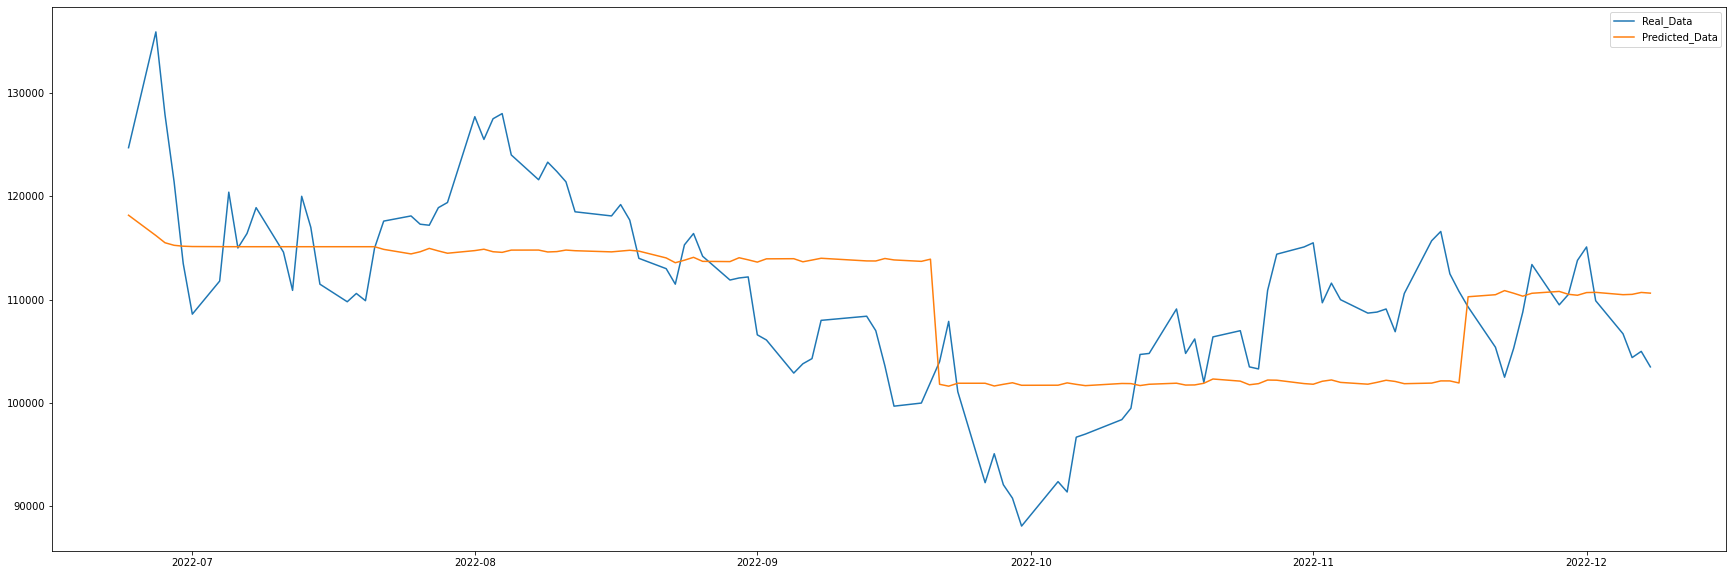

In [110]:
fig, axes = plt.subplots(1, 1, figsize=(30, 10))
#plt.plot(eco_v, label = 'Past_Data')
plt.plot(eco_real, label = 'Real_Data')
plt.plot(eco_predict_data2, label='Predicted_Data')  # 예측 데이터
plt.legend()
plt.show()

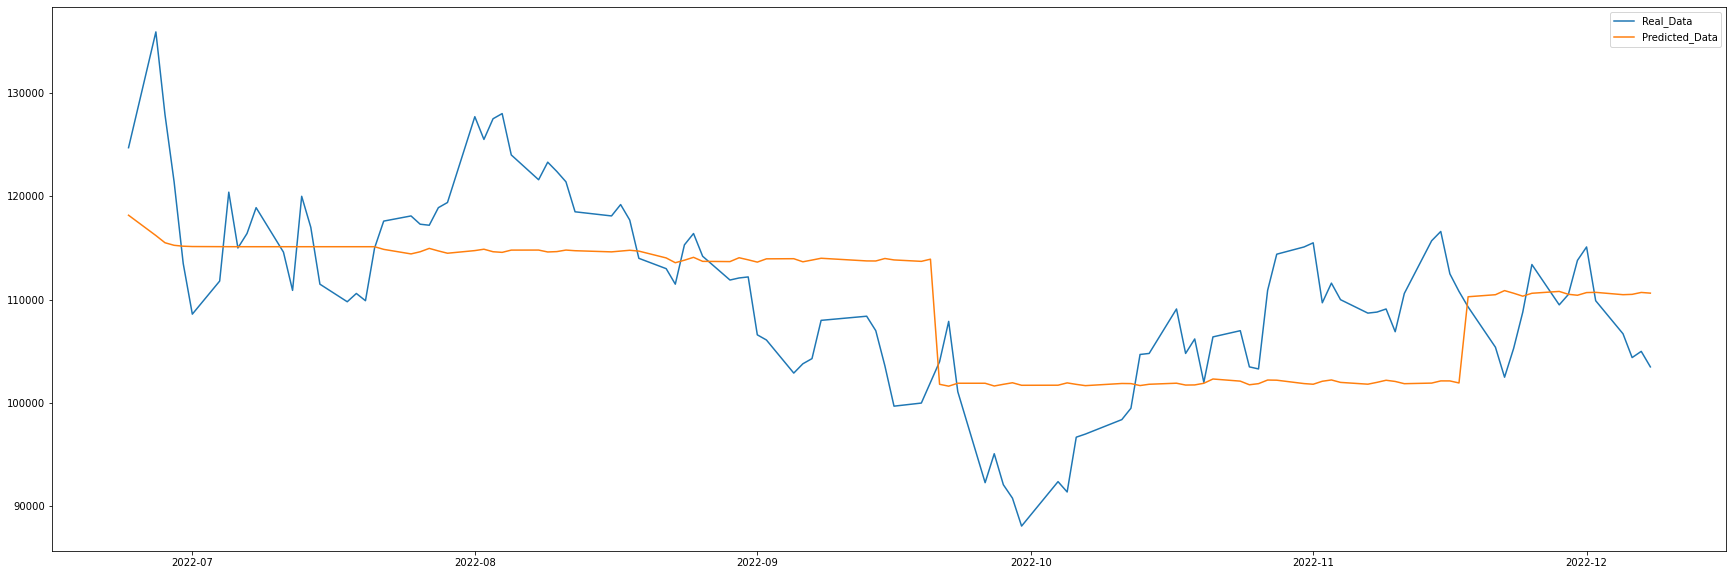

In [111]:
fig, axes = plt.subplots(1, 1, figsize=(30, 10))
#plt.plot(eco_v, label = 'Past_Data')
plt.plot(eco_real, label = 'Real_Data')
plt.plot(eco_predict_data2, label='Predicted_Data')  # 예측 데이터
plt.legend()
plt.show()

In [36]:
eco_cp1 = pd.concat([eco_cp, fc], axis = 0)
eco_cp1

,종가,0
2019-03-05 00:00:00,15616.0,NaN
2019-03-06 00:00:00,16975.0,NaN
2019-03-07 00:00:00,17296.0,NaN
2019-03-08 00:00:00,17271.0,NaN
2019-03-11 00:00:00,17098.0,NaN
...,...,...
2022-05-26 00:00:00,116778.0,NaN
2022-05-27 00:00:00,117104.0,NaN
2022-05-30 00:00:00,122644.0,NaN
2022-05-31 00:00:00,126605.0,NaN


GARCH

In [156]:
lotte_arima = pmdarima.auto_arima(lotte_log)
lotte_residual = lotte_arima.arima_res_.resid
lotte_garch = arch_model(lotte_residual, p=1, q=1)
lotte_garch_fitted = lotte_garch.fit()
print(lotte_garch_fitted.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 495352303.0546684
Iteration:      2,   Func. Count:     18,   Neg. LLF: 235.73167739960016
Iteration:      3,   Func. Count:     26,   Neg. LLF: -738.5096667547389
Iteration:      4,   Func. Count:     36,   Neg. LLF: 28149.637984480676
Iteration:      5,   Func. Count:     45,   Neg. LLF: -2256.849209994778
Iteration:      6,   Func. Count:     51,   Neg. LLF: -2054.2530266291565
Iteration:      7,   Func. Count:     59,   Neg. LLF: -2237.8039194185785
Iteration:      8,   Func. Count:     67,   Neg. LLF: -2153.190400580394
Iteration:      9,   Func. Count:     73,   Neg. LLF: -2278.380110952153
Iteration:     10,   Func. Count:     78,   Neg. LLF: -2278.385463667169
Iteration:     11,   Func. Count:     83,   Neg. LLF: -2278.3857276104645
Iteration:     12,   Func. Count:     88,   Neg. LLF: -2278.3856826693027
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2278.3857276092235
           

c:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005131. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [157]:
lotte_vol = lotte_garch_fitted.forecast(horizon = 20)

c:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


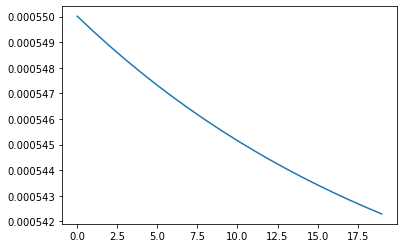

In [158]:
plt.plot(lotte_vol.variance.values[-1, :])
plt.show()

In [151]:
eco_arima = pmdarima.auto_arima(eco_log)
eco_residual = eco_arima.arima_res_.resid
eco_garch = arch_model(eco_residual, p=1, q=1)
eco_garch_fitted = eco_garch.fit()
print(eco_garch_fitted.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 647384.1700926473
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1604.2648676924236
Iteration:      3,   Func. Count:     27,   Neg. LLF: 809701.5350865098
Iteration:      4,   Func. Count:     34,   Neg. LLF: -1748.7836262220167
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1810.6443380893018
Iteration:      6,   Func. Count:     49,   Neg. LLF: -1786.7228492441113
Iteration:      7,   Func. Count:     56,   Neg. LLF: -1849.4637161719684
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1849.4637120405032
Iteration:      9,   Func. Count:     66,   Neg. LLF: -1849.4637186404639
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1849.4637186399164
            Iterations: 10
            Function evaluations: 66
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:

c:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [152]:
eco_vol = eco_garch_fitted.forecast(horizon = 20)

c:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [153]:
eco_vol.variance.iloc[-1]

h.01    0.000962
h.02    0.001022
h.03    0.001065
h.04    0.001096
h.05    0.001118
h.06    0.001135
h.07    0.001146
h.08    0.001155
h.09    0.001161
h.10    0.001166
h.11    0.001169
h.12    0.001171
h.13    0.001173
h.14    0.001174
h.15    0.001175
h.16    0.001176
h.17    0.001176
h.18    0.001177
h.19    0.001177
h.20    0.001177
Name: 932, dtype: float64

In [154]:
print(eco_vol.variance.values[-1, :][19])

0.0011769414438772287


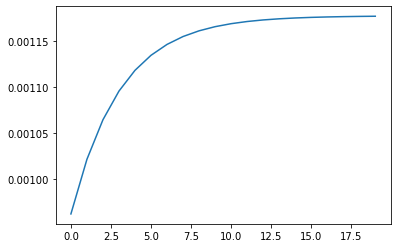

In [155]:
plt.plot(eco_vol.variance.values[-1, :])
plt.show()

In [159]:
eco_vol.variance.values[-1, :]

array([0.00096236, 0.00102165, 0.0010646 , 0.00109571, 0.00111823,
       0.00113455, 0.00114637, 0.00115493, 0.00116113, 0.00116562,
       0.00116887, 0.00117122, 0.00117293, 0.00117416, 0.00117506,
       0.00117571, 0.00117618, 0.00117652, 0.00117676, 0.00117694])

In [177]:
orion_value = orion_value.transpose()
orion_log = list(orion_value.values[0])
orion_log = np.log(orion_log)
orion_log = np.diff(orion_log)
orion_log

array([-0.0184337 , -0.01405175, -0.02871011,  0.02398196, -0.0047506 ,
       -0.00956945,  0.        , -0.03423317,  0.00990107,  0.        ,
       -0.01488861, -0.01511364, -0.00508907, -0.01128796, -0.00103252,
        0.01027758, -0.01441838,  0.03666398,  0.00498754,  0.00496279,
       -0.00496279, -0.00598804, -0.02022314,  0.02122364,  0.03440143,
       -0.0145988 ,  0.00488999, -0.05412142,  0.01634357, -0.00101368,
       -0.00304723, -0.01434451, -0.01980263,  0.01566612,  0.00516797,
        0.00308801,  0.00102722, -0.0092832 ,  0.01133449, -0.00719797,
        0.        ,  0.02042972, -0.01939826,  0.05026183, -0.05854346,
        0.01853812, -0.01335408, -0.01248715, -0.00104767, -0.07281869,
       -0.05087802,  0.02807202,  0.004603  , -0.01387305,  0.03432831,
       -0.02390552, -0.00346221,  0.02736773, -0.03200273,  0.00232019,
       -0.0034823 ,  0.01041074, -0.020931  , -0.03832804,  0.01694956,
        0.02957046, -0.00116618, -0.00937873,  0.00587201,  0.02

In [178]:
nova_value = nova_value.transpose()
nova_log = list(nova_value.values[0])
nova_log = np.log(nova_log)
nova_log = np.diff(nova_log)
nova_log

array([-0.00761499,  0.0050831 ,  0.00505739,  0.1319537 ,  0.00220807,
        0.02388949,  0.02761162, -0.02331374,  0.09594728,  0.0325094 ,
       -0.04033252, -0.03794076, -0.00204146, -0.02902684,  0.08265961,
       -0.02749003, -0.03435051, -0.03779214,  0.01697307, -0.03415548,
        0.        ,  0.036257  , -0.01055205,  0.00845053, -0.02126174,
        0.04413908, -0.02498328, -0.00634458, -0.01919571, -0.02186431,
        0.0946762 ,  0.        ,  0.03749396,  0.00571961, -0.04321356,
       -0.02434658,  0.04228222, -0.04022395,  0.        , -0.01033396,
        0.01648345,  0.01613881, -0.01613881, -0.02064712, -0.05347899,
       -0.0022032 , -0.01555986,  0.01113884,  0.07665488,  0.        ,
       -0.02282985, -0.01055205, -0.00638509,  0.        , -0.00642612,
       -0.03046176, -0.04291533,  0.02728598, -0.0389161 , -0.04547074,
        0.05478564, -0.0023206 , -0.00699429, -0.00469019, -0.00944689,
        0.02807707,  0.03838758,  0.04972503,  0.03528463, -0.01

In [124]:
eco_value = eco_value.transpose()
eco_log = list(eco_value.values[0])
eco_log = np.log(eco_log)
eco_log = np.diff(eco_log)
eco_log

array([ 0.08344564,  0.01873359, -0.00144647, -0.0100673 , -0.02931787,
       -0.01804917,  0.0588808 , -0.02316164, -0.01172528,  0.07272574,
       -0.01803166,  0.02214278, -0.04339641, -0.03643841,  0.01330211,
        0.03166907, -0.11885284, -0.02421267, -0.00331741, -0.0283095 ,
        0.03162691, -0.00331741, -0.021564  ,  0.06340893,  0.02025242,
        0.02137995,  0.01203223, -0.01509371, -0.03228097, -0.02060477,
        0.00638033,  0.        ,  0.00474269,  0.01881171, -0.00932995,
       -0.01898973,  0.        , -0.01771341,  0.01130251, -0.00481897,
        0.03331823,  0.01851673, -0.0138553 , -0.01724181, -0.07713241,
        0.00681422, -0.04152822, -0.0286511 ,  0.07017931, -0.01193817,
       -0.03849623, -0.03996264, -0.00935432,  0.02773077,  0.01804483,
        0.01065832,  0.04331745,  0.00335559, -0.00164215,  0.05430867,
       -0.04253142,  0.03608965,  0.03954956,  0.00924371,  0.02880101,
       -0.01810308,  0.0105847 , -0.0105847 ,  0.00454128, -0.02

In [125]:
best_AR_MA_checker(eco_log, 0, 5)

AR: 0, MA: 0, AIC: -3020; resid stationarity check: 0
AR: 0, MA: 1, AIC: -3641; resid stationarity check: 0
AR: 0, MA: 2, AIC: -3639; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 3, AIC: -3638; resid stationarity check: 0
AR: 0, MA: 4, AIC: -3638; resid stationarity check: 0
AR: 1, MA: 0, AIC: -3299; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 1, AIC: -3639; resid stationarity check: 0
AR: 1, MA: 2, AIC: -3637; resid stationarity check: 0
AR: 1, MA: 3, AIC: -3635; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 4, AIC: -3636; resid stationarity check: 0
AR: 2, MA: 0, AIC: -3415; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 1, AIC: -3638; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 2, AIC: -3635; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3, AIC: -3634; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4, AIC: -3643; resid stationarity check: 0
AR: 3, MA: 0, AIC: -3444; resid stationarity check: 0
AR: 3, MA: 1, AIC: -3638; resid stationarity check: 0
AR: 3, MA: 2, AIC: -3637; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3, AIC: -3641; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4, AIC: -3639; resid stationarity check: 0
AR: 4, MA: 0, AIC: -3491; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 1, AIC: -3639; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 2, AIC: -3633; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3, AIC: -3636; resid stationarity check: 0
AR: 4, MA: 4, AIC: -3638; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 2, best MA: 4, best AIC: -3643;  resid stationarity check:0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [138]:
eco_log_arma = sm.tsa.ARIMA(eco_log, order=(2, 0, 4))
eco_log_arma_res = eco_log_arma.fit()
print(eco_log_arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  933
Model:                 ARIMA(2, 0, 4)   Log Likelihood                1835.784
Date:                Sun, 11 Dec 2022   AIC                          -3655.568
Time:                        14:08:43   BIC                          -3616.860
Sample:                             0   HQIC                         -3640.807
                                - 933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.679      0.093      -0.000       0.004
ar.L1         -0.5665      0.134     -4.212      0.000      -0.830      -0.303
ar.L2         -0.6922      0.134     -5.174      0.0

In [131]:
lotte_value = lotte_value.transpose()
lotte_log = list(lotte_value.values[0])
lotte_log = np.log(lotte_log)
lotte_log = np.diff(lotte_log)
lotte_log

array([-0.00790518, -0.00264901,  0.00264901, -0.00264901, -0.00265604,
       -0.00801072,  0.00801072,  0.01844585,  0.01297035,  0.        ,
       -0.00516797, -0.01041676, -0.01583147, -0.01608614, -0.01086967,
       -0.01375538, -0.01394723,  0.        ,  0.00280505,  0.00836825,
        0.00277393, -0.00555557,  0.        , -0.00558661,  0.0027972 ,
        0.0027894 , -0.00839166,  0.00280505,  0.02489755, -0.00547947,
        0.00274349, -0.01936437,  0.00834497,  0.00276625,  0.        ,
       -0.00554018, -0.0111733 , -0.00281294,  0.0084152 , -0.00560226,
        0.00839166, -0.00558661, -0.02266386,  0.        , -0.0261263 ,
       -0.01481509, -0.01503788,  0.01204834, -0.00600602,  0.        ,
       -0.02748265,  0.00617286, -0.00308167,  0.        , -0.01242252,
       -0.01892801,  0.02204814, -0.00312013, -0.00626961, -0.00630917,
        0.01257878, -0.00312989,  0.00936044,  0.        , -0.01250016,
        0.01250016,  0.01846206, -0.00305344, -0.00613499, -0.00

In [132]:
best_AR_MA_checker(lotte_log, 0, 5)

AR: 0, MA: 0, AIC: -3774; resid stationarity check: 0
AR: 0, MA: 1, AIC: -4403; resid stationarity check: 0
AR: 0, MA: 2, AIC: -4401; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 3, AIC: -4400; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 4, AIC: -4398; resid stationarity check: 0
AR: 1, MA: 0, AIC: -4056; resid stationarity check: 0
AR: 1, MA: 1, AIC: -4401; resid stationarity check: 0
AR: 1, MA: 2, AIC: -4403; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 3, AIC: -4397; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 4, AIC: -4399; resid stationarity check: 0
AR: 2, MA: 0, AIC: -4161; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 1, AIC: -4400; resid stationarity check: 0
AR: 2, MA: 2, AIC: -4398; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3, AIC: -4399; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4, AIC: -4397; resid stationarity check: 0
AR: 3, MA: 0, AIC: -4219; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 1, AIC: -4397; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2, AIC: -4398; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3, AIC: -4398; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4, AIC: -4392; resid stationarity check: 0
AR: 4, MA: 0, AIC: -4243; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 1, AIC: -4397; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 2, AIC: -4399; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3, AIC: -4394; resid stationarity check: 0
AR: 4, MA: 4, AIC: -4389; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 1, best MA: 2, best AIC: -4403;  resid stationarity check:0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [141]:
lotte_log_arma = sm.tsa.ARIMA(lotte_log, order=(1, 0, 2))
lotte_log_arma_res = lotte_log_arma.fit()
print(lotte_log_arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  933
Model:                 ARIMA(1, 0, 2)   Log Likelihood                2210.636
Date:                Sun, 11 Dec 2022   AIC                          -4411.272
Time:                        14:10:16   BIC                          -4387.079
Sample:                             0   HQIC                         -4402.046
                                - 933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.989      0.323      -0.002       0.001
ar.L1          0.3354      0.654      0.513      0.608      -0.947       1.618
ma.L1         -0.3278      0.658     -0.498      0.6

In [164]:
import math

In [163]:
lotte_arma_forecast = lotte_log_arma_res.forecast(steps=20)

In [168]:
lotte_vol.variance.values[-1, :][19]**0.5

0.023287228996596406

In [166]:
math.sqrt(lotte_vol.variance.values[-1, :][19])

0.023287228996596406

In [165]:
lotte_VaR = lotte_arma_forecast[19] - (1.65 * math.sqrt(lotte_vol.variance.values[-1, :][19])) 
print(lotte_VaR)

-0.039228432787795635


In [169]:
eco_arma_forecast = eco_log_arma_res.forecast(steps=20)
eco_VaR = eco_arma_forecast[19] - (1.65 * math.sqrt(eco_vol.variance.values[-1, :][19]))
print(eco_VaR)

-0.05454291593425748


In [179]:
best_AR_MA_checker(orion_log, 0, 5)

C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 0, AIC: -3852; resid stationarity check: 0
AR: 0, MA: 1, AIC: -4548; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 2, AIC: -4550; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 3, AIC: -4551; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 4, AIC: -4549; resid stationarity check: 0
AR: 1, MA: 0, AIC: -4124; resid stationarity check: 0
AR: 1, MA: 1, AIC: -4549; resid stationarity check: 0
AR: 1, MA: 2, AIC: -4544; resid stationarity check: 0
AR: 1, MA: 3, AIC: -4546; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 4, AIC: -4548; resid stationarity check: 0
AR: 2, MA: 0, AIC: -4252; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 1, AIC: -4551; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 2, AIC: -4545; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3, AIC: -4540; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4, AIC: -4543; resid stationarity check: 0
AR: 3, MA: 0, AIC: -4334; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 1, AIC: -4549; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 2, AIC: -4548; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 3, AIC: -4543; resid stationarity check: 0
AR: 3, MA: 4, AIC: -4543; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0, AIC: -4365; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 1, AIC: -4547; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 2, AIC: -4544; resid stationarity check: 0
AR: 4, MA: 3, AIC: -4543; resid stationarity check: 0
AR: 4, MA: 4, AIC: -4543; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 0, best MA: 3, best AIC: -4551;  resid stationarity check:0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
orion_arma = sm.tsa.ARIMA(orion_log, order=(1,0,1))
orion_arma_res = orion_arma.fit()
print(orion_arma_res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  933
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2285.794
Date:                Sun, 11 Dec 2022   AIC                          -4563.588
Time:                        15:27:32   BIC                          -4544.235
Sample:                             0   HQIC                         -4556.208
                                - 933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.866e-05      0.001      0.141      0.888      -0.001       0.001
ar.L1          0.6120      0.200      3.055      0.002       0.219       1.005
ma.L1         -0.6846      0.184     -3.716      0.0

In [182]:
best_AR_MA_checker(nova_log, 0, 5)

AR: 0, MA: 0, AIC: -3469; resid stationarity check: 0
AR: 0, MA: 1, AIC: -4154; resid stationarity check: 0
AR: 0, MA: 2, AIC: -4154; resid stationarity check: 0
AR: 0, MA: 3, AIC: -4153; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 0, MA: 4, AIC: -4152; resid stationarity check: 0
AR: 1, MA: 0, AIC: -3752; resid stationarity check: 0
AR: 1, MA: 1, AIC: -4154; resid stationarity check: 0
AR: 1, MA: 2, AIC: -4150; resid stationarity check: 0
AR: 1, MA: 3, AIC: -4152; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 4, AIC: -4150; resid stationarity check: 0
AR: 2, MA: 0, AIC: -3866; resid stationarity check: 0
AR: 2, MA: 1, AIC: -4153; resid stationarity check: 0
AR: 2, MA: 2, AIC: -4152; resid stationarity check: 0
AR: 2, MA: 3, AIC: -4150; resid stationarity check: 0
AR: 2, MA: 4, AIC: -4147; resid stationarity check: 0
AR: 3, MA: 0, AIC: -3912; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 1, AIC: -4151; resid stationarity check: 0
AR: 3, MA: 2, AIC: -4149; resid stationarity check: 0
AR: 3, MA: 3, AIC: -4147; resid stationarity check: 0
AR: 3, MA: 4, AIC: -4145; resid stationarity check: 0
AR: 4, MA: 0, AIC: -3961; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 1, AIC: -4153; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 2, AIC: -4150; resid stationarity check: 0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3, AIC: -4146; resid stationarity check: 0
AR: 4, MA: 4, AIC: -4145; resid stationarity check: 0
the following function prints AIC criteria and finds the paramters for minimum AIC criteria
best AR: 0, best MA: 2, best AIC: -4154;  resid stationarity check:0


C:\Users\Kimbeomjoon.DESKTOP-5T6FIPU\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [187]:
nova_arma2 = pmdarima.auto_arima(nova_log)
print(nova_arma2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  933
Model:               SARIMAX(4, 1, 1)   Log Likelihood                2082.649
Date:                Sun, 11 Dec 2022   AIC                          -4153.297
Time:                        15:31:37   BIC                          -4124.273
Sample:                             0   HQIC                         -4142.228
                                - 933                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0618      0.029     -2.133      0.033      -0.119      -0.005
ar.L2         -0.0182      0.030     -0.598      0.550      -0.078       0.041
ar.L3         -0.0568      0.030     -1.906      0.0

In [188]:
orion_arima = pmdarima.auto_arima(orion_log)
orion_residual = orion_arima.arima_res_.resid
orion_garch = arch_model(orion_residual, p=1, q=1)
orion_garch_fitted = orion_garch.fit()
print(orion_garch_fitted.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 937030782260995.8
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3246532683684.658
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2305.585436324787
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2305.59
Distribution:                  Normal   AIC:                          -4603.17
Method:            Maximum Likelihood   BIC:                          -4583.82
                                        No. Observations:                  933
Date:                Sun, Dec 11 2022   Df Residuals:                      932
Time:           

c:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004358. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [189]:
orion_vol = orion_garch_fitted.forecast(horizon=20)

c:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


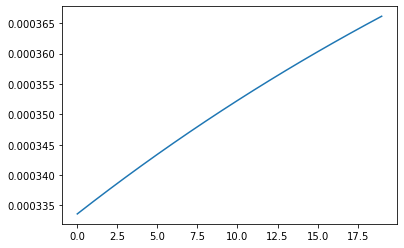

In [190]:
plt.plot(orion_vol.variance.values[-1, :])
plt.show()

In [192]:
nova_arima = pmdarima.auto_arima(nova_log)
nova_residual = nova_arima.arima_res_.resid
nova_garch = arch_model(nova_residual, p=1, q=1)
nova_garch_fitted = nova_garch.fit()
print(nova_garch_fitted.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.970381005200974e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3058525.3162045684
Iteration:      3,   Func. Count:     28,   Neg. LLF: 88827.55038772147
Iteration:      4,   Func. Count:     39,   Neg. LLF: 1252736878819554.2
Iteration:      5,   Func. Count:     49,   Neg. LLF: -2125.6817536119083
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2125.6817568087054
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2125.68
Distribution:                  Normal   AIC:                          -4243.36
Method:            Maximum L

c:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006752. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


c:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


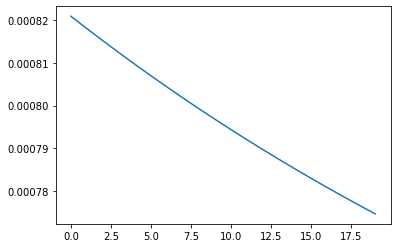

In [194]:
nova_vol = nova_garch_fitted.forecast(horizon=20)
plt.plot(nova_vol.variance.values[-1, :])
plt.show()